#### General setup.
___

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 8]

<br>

#### Load the data set.
___

In [3]:
# Load the data set with specified encoding since it's not in utf-8
billboard = pd.read_csv('data/billboard.csv', encoding='latin-1')
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
billboard.tail()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
billboard.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

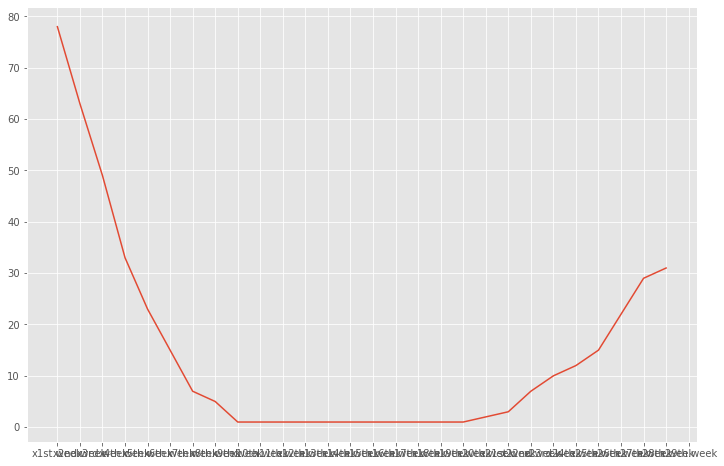

In [6]:
# Chart evolution for the first song
plt.plot(billboard.loc[0, 'x1st.week':'x76th.week'])
plt.show()

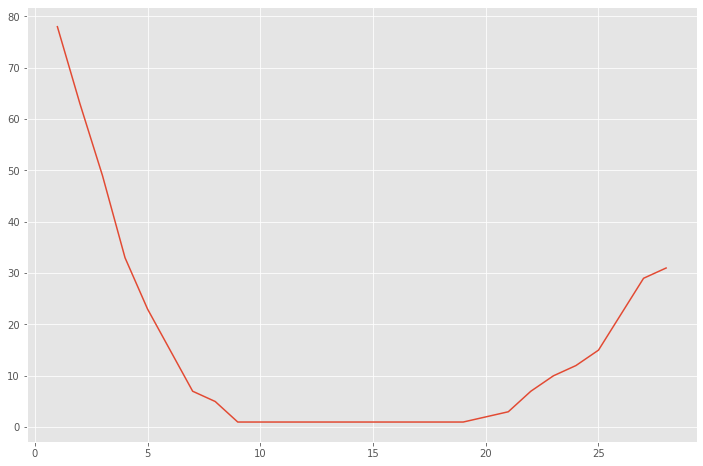

In [7]:
# Adjust the x axis
plt.plot(range(1,77), billboard.loc[0, 'x1st.week':'x76th.week'])
plt.show()

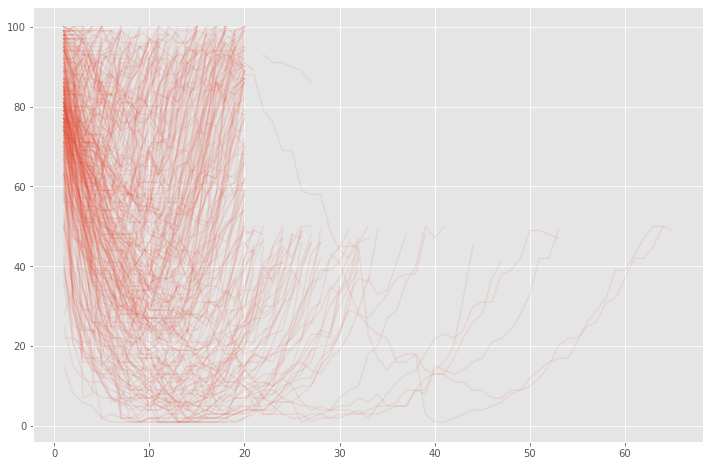

In [8]:
# Check the same as above for all rows
for _, row in billboard.iterrows():
    plt.plot(range(1,77), row['x1st.week':'x76th.week'], color='C0', alpha=0.1)

It is clear from the above that the songs usually don't last very long. Also, it appears that the rankings are not very useful for the analysis since they are divided between multiple columns. So we need to rearrange the data set.

<br>

#### Cleaning the data set.
___

In [9]:
# Select only some columns from the original data set
bshort = billboard[['artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'x1st.week', 'x2nd.week', 'x3rd.week']]

In [10]:
# Rename the columns
bshort.columns = ['artist', 'track', 'time', 'genre', 'date.entered', 'wk1', 'wk2', 'wk3']
bshort.head()

,artist,track,time,genre,date.entered,wk1,wk2,wk3
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,Rock,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,57,47.0,45.0


In [11]:
# Melting each row into multiple ones to represent the simple ranking
bmelt = bshort.melt(['artist', 'track', 'time', 'genre', 'date.entered'], 
                    ['wk1', 'wk2', 'wk3'], 'week', 'rank')
bmelt.head()

,artist,track,time,genre,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,wk1,78.0
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,wk1,71.0
3,Madonna,Music,3:45,Rock,2000-08-12,wk1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,wk1,57.0


In [12]:
bmelt.query('track == "Music"')

,artist,track,time,genre,date.entered,week,rank
3,Madonna,Music,3:45,Rock,2000-08-12,wk1,41.0
320,Madonna,Music,3:45,Rock,2000-08-12,wk2,23.0
637,Madonna,Music,3:45,Rock,2000-08-12,wk3,18.0


In [13]:
# Convert week column to a number by taking the third char in each string
bmelt['week'] = bmelt['week'].apply(lambda s: int(s[2]))

In [14]:
bmelt.query('track == "Music"')

,artist,track,time,genre,date.entered,week,rank
3,Madonna,Music,3:45,Rock,2000-08-12,1,41.0
320,Madonna,Music,3:45,Rock,2000-08-12,2,23.0
637,Madonna,Music,3:45,Rock,2000-08-12,3,18.0


In [15]:
# Convert date column to datetime object
bmelt['date.entered'] = pd.to_datetime(bmelt['date.entered'])

In [16]:
bmelt['date.entered'][0]

Timestamp('2000-09-23 00:00:00')

In [17]:
# For example the second week 
bmelt['date.entered'][0] + pd.Timedelta('7 days')

Timestamp('2000-09-30 00:00:00')

In [18]:
# Get the correct date for each week
bmelt['date'] = bmelt['date.entered'] + pd.Timedelta('7 days') * (bmelt['week'] - 1)
bmelt['date']

0     2000-09-23
1     2000-02-12
2     1999-10-23
3     2000-08-12
4     2000-08-05
         ...    
946   2000-08-19
947   2000-02-26
948   2000-09-16
949   2000-07-15
950   2000-11-11
Name: date, Length: 951, dtype: datetime64[ns]

In [19]:
# Delete the column date entered
bmelt.drop(['date.entered'], axis=1, inplace = True)

In [20]:
bmelt.query('track == "Music"')

,artist,track,time,genre,week,rank,date
3,Madonna,Music,3:45,Rock,1,41.0,2000-08-12
320,Madonna,Music,3:45,Rock,2,23.0,2000-08-19
637,Madonna,Music,3:45,Rock,3,18.0,2000-08-26


In [21]:
# Final data frame with values sorted by artist and track name
bfinal = bmelt[['artist', 'track', 'time', 'genre', 'date', 'week', 'rank']]
bfinal = bfinal.sort_values(['artist', 'track'])
bfinal.head()

,artist,track,time,genre,date,week,rank
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,1,87.0
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-03-04,2,82.0
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-03-11,3,72.0
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2000-09-02,1,91.0
604,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2000-09-09,2,87.0


<br>

#### Data Normalization.
___

After tidying the data set we created some redundancy where artist names, track names and time appearing multiple times. So now we can create a separate table with track data and link it to the table above using an index.

In [22]:
# Create a table with track data
tracks = bfinal[['artist', 'track', 'time', 'genre']].drop_duplicates()
tracks.head()

,artist,track,time,genre
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B
24,3 Doors Down,Kryptonite,3:53,Rock
193,3 Doors Down,Loser,4:24,Rock
69,504 Boyz,Wobble Wobble,3:35,Rap


In [23]:
# Reset the index and create a new column with ids
tracks.index.name = 'id'
tracks_id = tracks.reset_index()
tracks_id.head()

,id,artist,track,time,genre
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap
1,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B
2,24,3 Doors Down,Kryptonite,3:53,Rock
3,193,3 Doors Down,Loser,4:24,Rock
4,69,504 Boyz,Wobble Wobble,3:35,Rap


In [24]:
#Merging the tables
pd.merge(tracks_id, bfinal, on=['track', 'artist', 'time', 'genre']).head()

,id,artist,track,time,genre,date,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-02-26,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-03-04,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2000-03-11,3,72.0
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2000-09-02,1,91.0
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2000-09-09,2,87.0


In [25]:
# Removing the data we don't need
tidy_set = pd.merge(tracks_id, bfinal, on=['track', 'artist', 'time', 'genre']
                   ).drop(['track', 'artist', 'time', 'genre'], axis=1)
tidy_set.head()

,id,date,week,rank
0,246,2000-02-26,1,87.0
1,246,2000-03-04,2,82.0
2,246,2000-03-11,3,72.0
3,287,2000-09-02,1,91.0
4,287,2000-09-09,2,87.0


In [26]:
# Find the index of the artist with the lowest rank in week 1
lowest_rating = tidy_set[tidy_set.week == 1]['rank'].idxmin()
lowest_rating

756

In [27]:
# Find the song
tidy_set.loc[lowest_rating]

id                        1
date    2000-02-12 00:00:00
week                      1
rank                     15
Name: 756, dtype: object

In [28]:
# The information in track data
tracks_id.query('id == 1')

,id,artist,track,time,genre
252,1,Santana,"Maria, Maria",4:18,Rock


In [29]:
# Find the song
tidy_set.loc[tidy_set[tidy_set.week == 1]['rank'].idxmax()]

id                      248
date    2000-02-12 00:00:00
week                      1
rank                    100
Name: 258, dtype: object

In [30]:
tracks_id.query('id == 248')

,id,artist,track,time,genre
86,248,Drama,"Left, Right, Left",3:37,Rap


<br>

#### End
___